In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analyze the relationship between the type of
cuisine and the restaurant's rating.

In [3]:
df=pd.read_csv(r'c:\Users\Dell\Downloads\Dataset .csv')

In [4]:
rating_stat=df.groupby('Cuisines')['Aggregate rating'].describe()

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
rating_stat

,count,mean,std,min,25%,50%,75%,max
Cuisines,,,,,,,,
Afghani,4.0,0.725,1.45,0.0,0.0,0.0,0.725,2.9
"Afghani, Mughlai, Chinese",1.0,0.000,NaN,0.0,0.0,0.0,0.000,0.0
"Afghani, North Indian",1.0,0.000,NaN,0.0,0.0,0.0,0.000,0.0
"Afghani, North Indian, Pakistani, Arabian",1.0,0.000,NaN,0.0,0.0,0.0,0.000,0.0
African,1.0,4.700,NaN,4.7,4.7,4.7,4.700,4.7
...,...,...,...,...,...,...,...,...
"Western, Asian, Cafe",1.0,4.200,NaN,4.2,4.2,4.2,4.200,4.2
"Western, Fusion, Fast Food",1.0,3.200,NaN,3.2,3.2,3.2,3.200,3.2
World Cuisine,1.0,4.900,NaN,4.9,4.9,4.9,4.900,4.9


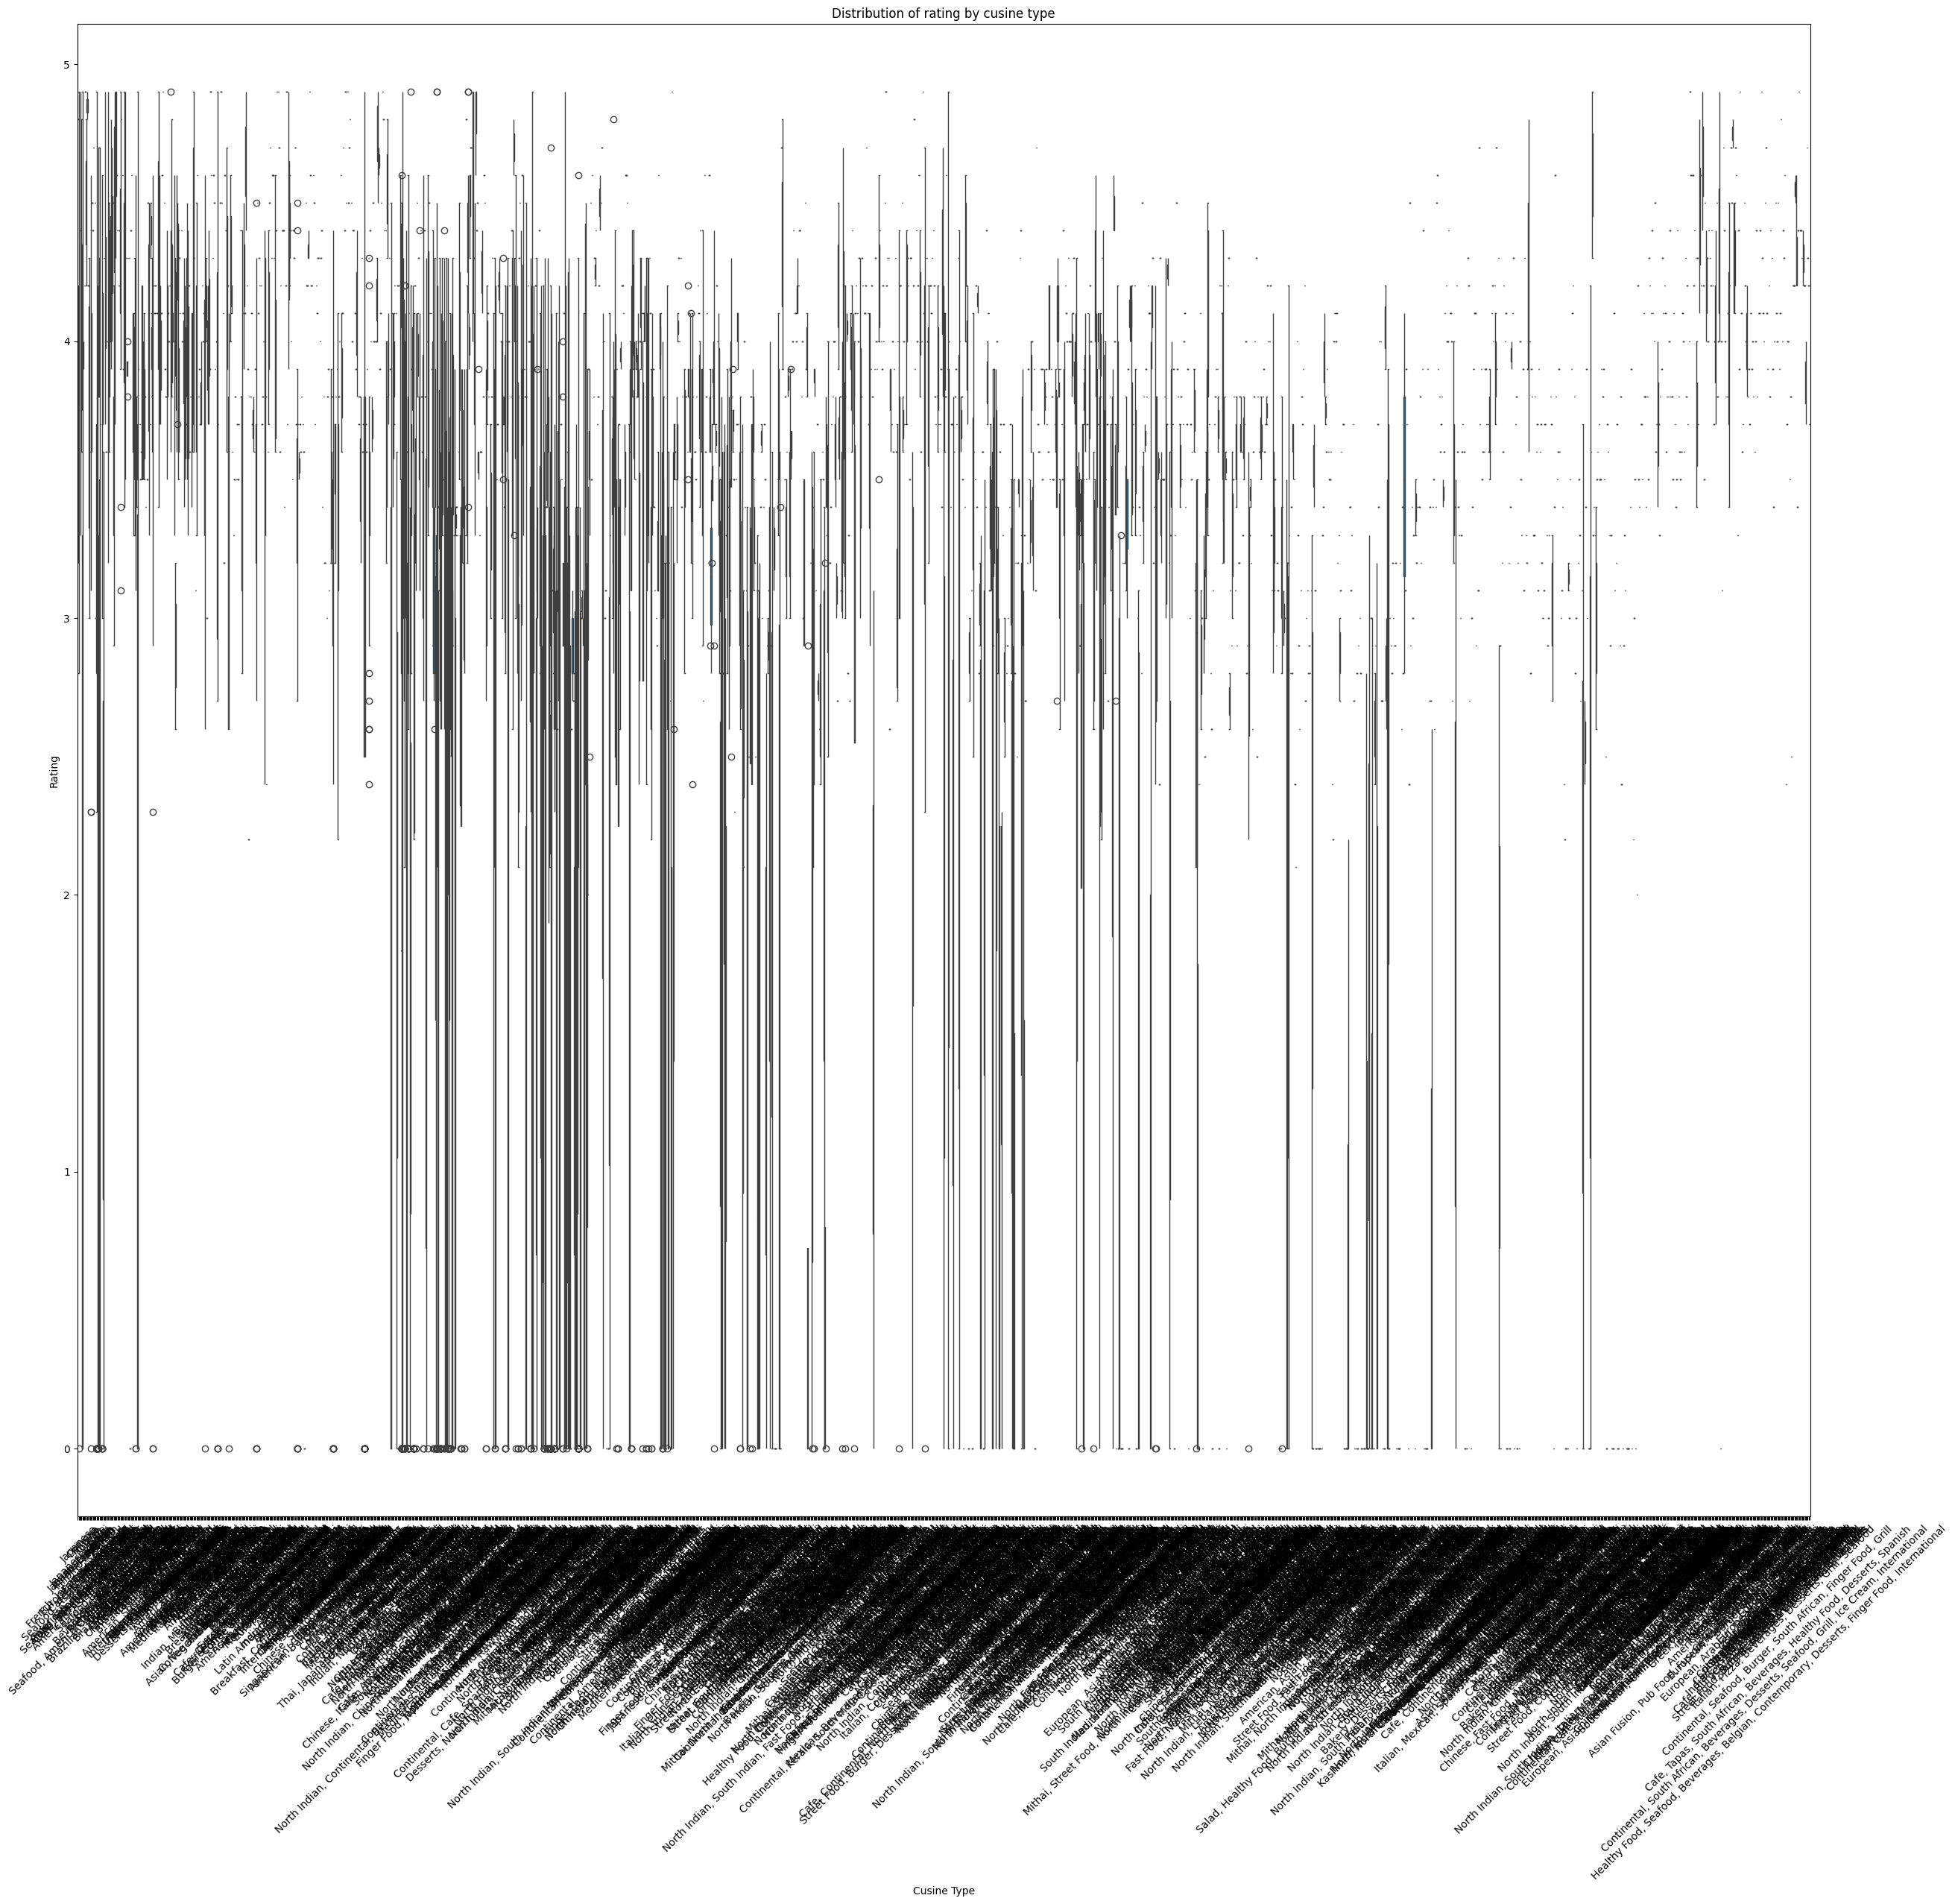

In [7]:
plt.figure(figsize=(30,26))
sns.boxplot(x='Cuisines',y='Aggregate rating',data=df)
plt.xticks(rotation=45)
plt.title('Distribution of rating by cusine type')
plt.xlabel('Cusine Type')
plt.ylabel('Rating')
plt.show()

In [15]:
corr=rating_stat.corr()

<Axes: >

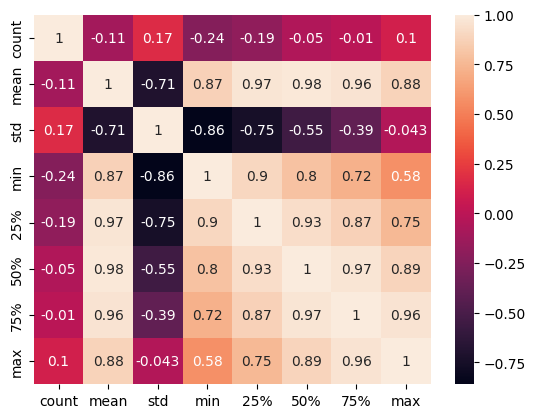

In [17]:
sns.heatmap(corr,annot=True)

Identify the most popular cuisines among
customers based on the number of votes.Identify the most popular cuisines among
customers based on the number of votes.

In [18]:
cusine_vote=df.groupby('Cuisines')['Votes'].sum().describe()

In [21]:
print(cusine_vote)

count     1825.000000
mean       819.681644
std       2643.816744
min          0.000000
25%         54.000000
50%        212.000000
75%        694.000000
max      53747.000000
Name: Votes, dtype: float64


In [30]:
popular_cusine=cusine_vote.sort_values(ascending=False)

In [26]:
top_cusine=popular_cusine.head(5)

In [27]:
top_cusine

max      53747.000000
std       2643.816744
count     1825.000000
mean       819.681644
75%        694.000000
Name: Votes, dtype: float64

In [28]:
print('Top cusines based on number of votes',top_cusine)

Top cusines based on number of votes max      53747.000000
std       2643.816744
count     1825.000000
mean       819.681644
75%        694.000000
Name: Votes, dtype: float64


Determine if there are any specific cuisines
that tend to receive higher ratings.

In [32]:
avg_rating=df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

In [33]:
print('Average rating for each cuisine type: ',avg_rating)

Average rating for each cuisine type:  Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64
